In [1]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# se establecen dimensiones de mundo
nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2

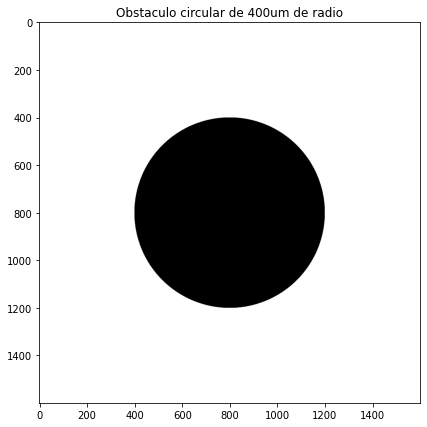

In [6]:
#Apertura circular
radio =400
mask=np.ones((1600,1600),dtype="uint8")
cv2.circle(mask,(800,800),radio,0,-1)  #Radio del obstaculo es de 400um
fig, ax = plt.subplots(1,1,figsize=(7, 7))
ax.imshow(mask,cmap="gray")
ax.set_title("Obstaculo circular de 400um de radio")
plt.show()

In [7]:
# ESPECTRO ANGULAR POR FFT
def ang_spec(entrada,z, del_x, del_y, wave_length):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    
    # Dimensiones longitudinales de la imagen
    Lx = del_x*N
    Ly = del_y*M
    # Tamaño muestral en las frecuencias
    del_fx = 1/Lx
    del_fy = 1/Ly
        
    if N%2==0:
        x = np.arange(-int(N/2),int(N/2),1)
    else:
        x = np.arange(-int(N/2),int(N/2)+1,1)

    if M%2==0:
        y = np.arange(-int(M/2),int(M/2),1)
    else:
        y = np.arange(-int(M/2),int(M/2)+1,1)
        
        
    p, q = np.meshgrid(x,y)
    fx = p*del_fx
    fy = q*del_fy
        
    # espectro angular en el plano de entrada
    A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
    ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
    ker = ker
    A_z = A_0*ker
    U_z = np.fft.ifft2(A_z)

    #print(f'Longitud x de la imagen: {round(del_x*np.shape(entrada)[1]*100, 2)} cm \nLongitud y de la imagen: {round(del_y*np.shape(entrada)[0]*100, 2)} cm ')
    #print(f'Máxima distancia de propagación aceptable: {round(dist, 4)} metros o {round(dist*100, 2)} centímetros')

    return U_z


In [11]:
# Experimento de arago empelando Difracción angular 
#Diferentes imagenes de difracción a diferentes z

salida1 = (np.abs(((ang_spec(mask,2.527*mm,1*um,1*um,633*nm))))**2)
salida2 = (np.abs(((ang_spec(mask,2.527*mm,1*um,1*um,633*nm))))**2)[700:900,700:900]
salida3 = (np.abs(((ang_spec(mask,1*mm,1*um,1*um,633*nm))))**2)
salida4 = (np.abs(((ang_spec(mask,7*mm,1*um,1*um,633*nm))))**2)

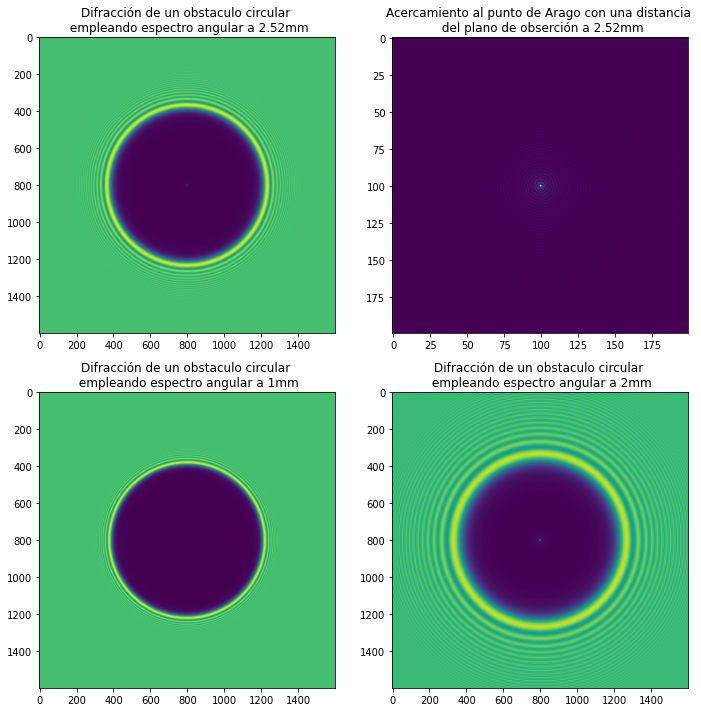

In [143]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0][0].imshow(salida1)
ax[0][0].set_title("Difracción de un obstaculo circular \n empleando espectro angular a 2.52mm")
ax[0][1].imshow(salida2)
ax[0][1].set_title("Acercamiento al punto de Arago con una distancia \n del plano de obserción a 2.52mm")
ax[1][0].imshow(salida3)
ax[1][0].set_title("Difracción de un obstaculo circular \n empleando espectro angular a 1mm")
ax[1][1].imshow(salida4)
ax[1][1].set_title("Difracción de un obstaculo circular \n empleando espectro angular a 2mm")
fig.tight_layout()
plt.show()

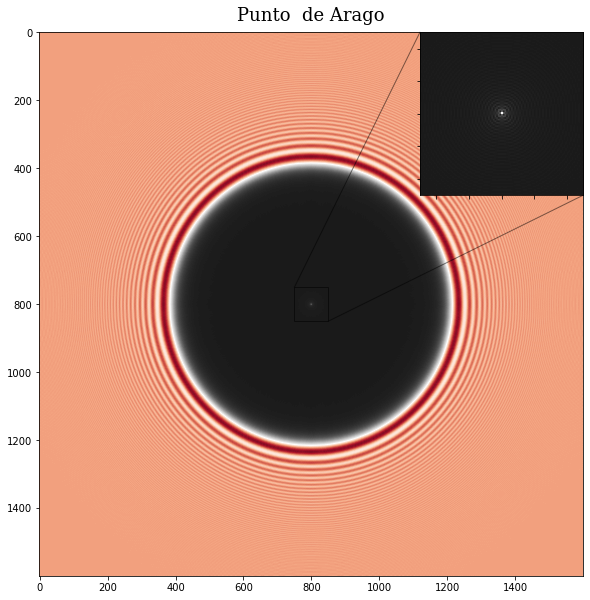

In [133]:

fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(salida1,cmap="RdGy_r") # Se grafica la imagen grande considerando tonalidades rojas debido a laser de 633nm
ax.set_title("Punto  de Arago",fontdict={'family': 'serif','size': 18},y=1.01) #titulo  "family es tipo de letra" "size es tamaño del titulo" "y es separación del titulo en y"
# psición del zoom [x0 y0 ancho alto]
axins = ax.inset_axes([0.7, 0.7, 0.3, 0.3])
axins.imshow(salida1,cmap="RdGy_r")
# relimito dónde estará el zoom
x1, x2, y1, y2 = [750,850,750,850]
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.show()

In [64]:
#Espectro angular modificado, salida del valor del pixel del medio de la imagen

def ang_spec(entrada,z, del_x, del_y, wave_length):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    
    # Dimensiones longitudinales de la imagen
    Lx = del_x*N
    Ly = del_y*M
    # Tamaño muestral en las frecuencias
    del_fx = 1/Lx
    del_fy = 1/Ly
        
    if N%2==0:
        x = np.arange(-int(N/2),int(N/2),1)
    else:
        x = np.arange(-int(N/2),int(N/2)+1,1)

    if M%2==0:
        y = np.arange(-int(M/2),int(M/2),1)
    else:
        y = np.arange(-int(M/2),int(M/2)+1,1)
        
        
    p, q = np.meshgrid(x,y)
    fx = p*del_fx
    fy = q*del_fy
        
    # espectro angular en el plano de entrada
    A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
    ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
    ker = ker
    A_z = A_0*ker
    U_z = np.fft.ifft2(A_z)


    return U_z[800,800]

In [96]:
#Datos de intensidad para diferentes distancias entre 0 y el Z maximo para el espectro angular 
paso = 300
a = np.linspace(0,2.52*mm,paso)
b = np.zeros_like(a) 
for i in range(0,paso):
    b[i] = np.abs(ang_spec(mask,a[i],1*um,1*um,633*nm))**2

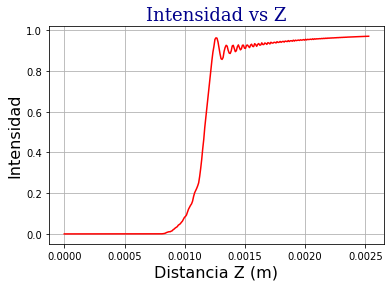

In [97]:
plt.plot(a, b, "r")
plt.xlabel("Distancia Z (m)", size = 16,)
plt.ylabel("Intensidad", size = 16)

plt.title("Intensidad vs Z", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 18})

plt.grid(True)
plt.show()

In [ ]:
#Producción imagen de barrido
paso = 2000
a = np.linspace(0,15*mm,paso)
b = np.zeros((np.shape(mask)[1],paso)) 
for i in range(0,paso):
    b[:,i]= (np.abs(((ang_spec(mask,a[i],1*um,1*um,633*nm))))**2)[800,:]


Text(0, 0.5, '[um]')

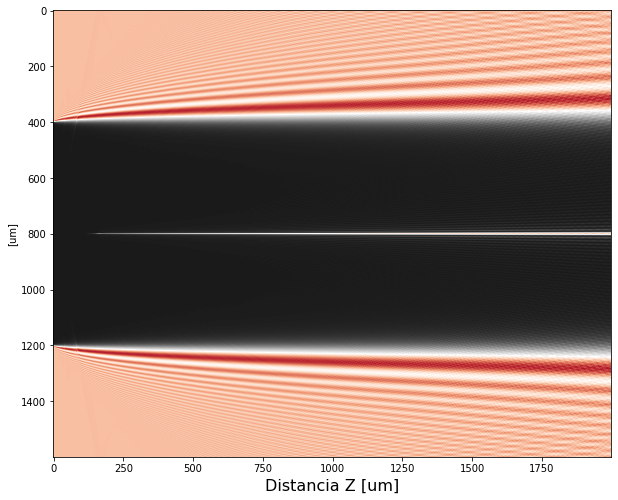

In [82]:
#Grafico imagen de barrido en eje z
fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(b,cmap="RdGy_r")
plt.xlabel("Distancia Z [um]", size = 16,)
plt.ylabel("[um]")